In [6]:
import cv2
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
from IPython.display import Audio, display

import warnings
warnings.filterwarnings("ignore")
print("libraries imported")

libraries imported


In [5]:

def load_data(data_dir, max_pad_len=128):
    labels, features = [], []
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            # Load the audio file
            audio, sr = librosa.load(file_path, duration=2.0)
            # Convert to MFCC
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            # Pad or truncate MFCCs to ensure uniform shape
            if mfccs.shape[1] < max_pad_len:
                pad_width = max_pad_len - mfccs.shape[1]
                mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
            else:
                mfccs = mfccs[:, :max_pad_len]
            # Resize MFCC to 128x128
            mfccs_resized = cv2.resize(mfccs, (448, 448))
            mfccs_resized = np.expand_dims(mfccs_resized, axis=-1)  # Add channel dimension
            features.append(mfccs_resized)
            labels.append(label)
    return np.array(features), np.array(labels)

In [11]:
data_dir = data_dir = r'M:\virtualenvironment\gunshot\gunshotdetection\gunshots_audio'


In [12]:
import os

# Update this path to your actual dataset location
data_dir = r'M:\virtualenvironment\gunshot\gunshotdetection\gunshots_audio'
  # Ensure the path is correct

# Check if the path exists
if os.path.exists(data_dir):
    print("Path exists!")
    # List all categories (folders) in the dataset
    categories = os.listdir(data_dir)
    print("Categories:", categories)
else:
    print("Path does not exist. Please check the path.")


Path exists!
Categories: ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M16', 'M249', 'M4', 'MG-42', 'MP5', 'Zastava M92']


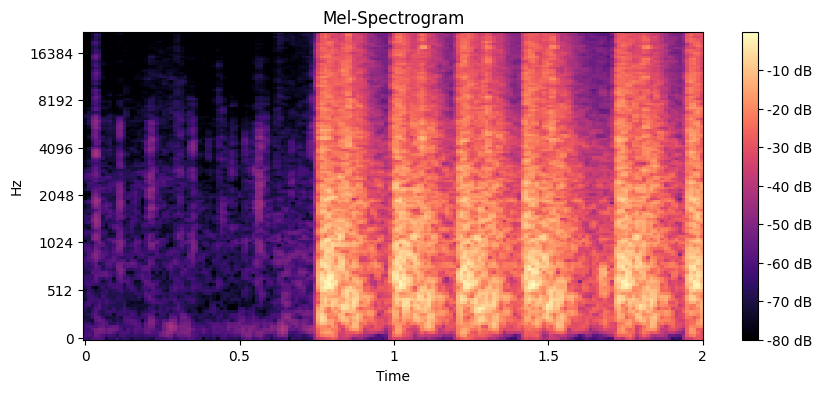

In [17]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
file_path = r'M:\virtualenvironment\gunshot\gunshotdetection\gunshots_audio\AK-12\3 (1).wav'

y, sr = librosa.load(file_path, sr=None)

# Generate the mel-spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to dB
S_DB = librosa.power_to_db(S, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()


In [21]:
import librosa
import numpy as np

# Corrected file path
file_path = r'M:\virtualenvironment\gunshot\gunshotdetection\gunshots_audio\AK-12\3 (1).wav'

# Load the audio file
audio, sample_rate = librosa.load(file_path, sr=None)

# Extract features (example with MFCCs)
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
mfccs_mean = np.mean(mfccs.T, axis=0)  # Take mean to get fixed-length feature vector

print("MFCCs mean shape:", mfccs_mean.shape)


MFCCs mean shape: (13,)
